In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - RL stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load GME trading data
df = pd.read_csv('gmedata.csv')

# Convert data to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

# Set Date as the index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [3]:
# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

# View environment features
env.signal_features

# View environment prices
env.prices

array([264.5 , 260.  , 265.  , 246.9 , 194.5 , 137.74, 132.35, 124.18,
       118.18, 120.4 , 101.74, 108.73,  91.71,  44.97,  46.  ,  40.59,
        40.69,  45.94,  49.51,  52.4 ,  51.1 ,  51.2 ,  50.31,  60.  ,
        63.77,  53.5 ,  92.41,  90.  , 225.  , 325.  , 193.6 , 347.51,
       147.98,  76.79,  65.01,  43.03,  39.12,  39.36,  35.5 ,  39.91,
        31.4 ,  19.95,  19.94,  17.69,  18.08,  18.36,  17.37,  17.25,
        18.84,  19.26,  19.38,  20.99,  20.15,  20.57,  19.46,  15.53,
        15.63,  14.83,  13.85,  13.85,  12.72,  13.31,  14.12,  13.66,
        16.94,  16.35,  16.9 ,  16.12,  16.58,  15.8 ,  16.56,  16.08,
        14.75,  13.67,  13.9 ,  12.71,  12.46,  11.57,  11.63,  12.06,
        11.01,  11.13,  11.75,  11.1 ,  11.49,  11.86,  11.45,  10.91,
        11.57,  10.75,  10.47,  11.73,  11.82,  12.69,  13.45,  15.  ,
        14.91,  14.1 ,  13.86,  13.91])

In [4]:
# # Explore the environment
# env.action_space

# state = env.reset()
# while True:
#     action = env.action_space.sample()
#     n_state, reward, done, info = env.step(action)
#     if done:
#         print("info", info)
#         break

# plt.figure(figsize=(15, 6))
# plt.cla()
# env.render_all()
# plt.show() 

In [5]:
# # Creating our dummy vectorizing environment
# env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
# env = DummyVecEnv([env_maker])

# # Initializing and training the A2C model
# model = A2C('MlpPolicy', env, verbose=1)
# model.learn(total_timesteps=10000)

In [6]:
# env.action_space

In [7]:
# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
# obs = env.reset()
# while True: 
#     obs = obs[np.newaxis, ...]
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = env.step(action)
#     if done:
#         print("info", info)
#         break


In [8]:
# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()

In [9]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [10]:
df['Volume']=df['Volume'].apply(lambda x: float(x.replace(",","")))

In [11]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [12]:
df['SMA'] = TA.SMA(df,12) 
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0,inplace=True)

In [13]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-03-12,275.00,295.50,262.27,264.50,25845900.0,0.000000,0.000000,0.0
2021-03-11,241.64,281.50,232.60,260.00,28312490.0,0.000000,0.000000,-28312490.0
2021-03-10,269.43,348.50,172.00,265.00,71570570.0,0.000000,54.474708,43258080.0
2021-03-09,217.71,249.85,208.51,246.90,39099328.0,0.000000,17.439298,4158752.0
2021-03-08,154.89,210.87,146.10,194.50,63565621.0,0.000000,5.590185,-59406869.0
2021-03-05,128.17,151.53,127.50,137.74,30733670.0,0.000000,3.118483,-90140539.0
2021-03-04,125.00,147.87,115.30,132.35,32606891.0,0.000000,2.983575,-122747430.0
2021-03-03,122.51,127.75,113.12,124.18,19273881.0,0.000000,2.786780,-142021311.0
2021-03-02,116.93,133.20,112.20,118.18,33783039.0,0.000000,2.648611,-175804350.0


In [14]:
def add_signals(env):
    start=env.frame_bound[0] -env.window_size
    end= env.frame_bound[1]
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features=env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
    return prices,signal_features

In [15]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50))

In [16]:
# Creating our dummy vectorizing environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

# Initializing and training the A2C model
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 797      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.667   |
|    explained_variance | 0.595    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 21.7     |
|    value_loss         | 1.37e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 803      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 0.793    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.0171  |
|    value_loss      

------------------------------------
| time/                 |          |
|    fps                | 825      |
|    iterations         | 1700     |
|    time_elapsed       | 10       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0.365    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | -0.194   |
|    value_loss         | 4.62e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 825      |
|    iterations         | 1800     |
|    time_elapsed       | 10       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.0775  |
|    explained_variance | 0.947    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 0.0373   |
|    value_loss         | 16.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 824      |
|    iterations         | 3300     |
|    time_elapsed       | 20       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.0603  |
|    explained_variance | -156     |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 0.00502  |
|    value_loss         | 0.318    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 824      |
|    iterations         | 3400     |
|    time_elapsed       | 20       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.0864  |
|    explained_variance | -0.302   |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | 6.61     |
|    value_loss         | 85.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 824      |
|    iterations         | 4900     |
|    time_elapsed       | 29       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.0514  |
|    explained_variance | 0.991    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | -0.0513  |
|    value_loss         | 27.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 825      |
|    iterations         | 5000     |
|    time_elapsed       | 30       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.00433 |
|    explained_variance | 0.589    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.00392  |
|    value_loss         | 4e+03    |
-

-------------------------------------
| time/                 |           |
|    fps                | 841       |
|    iterations         | 6500      |
|    time_elapsed       | 38        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.00141  |
|    explained_variance | 0.972     |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | -2.64e-05 |
|    value_loss         | 0.145     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 843      |
|    iterations         | 6600     |
|    time_elapsed       | 39       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.0813  |
|    explained_variance | -2.67    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | 0.0302   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 863      |
|    iterations         | 8100     |
|    time_elapsed       | 46       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.00833 |
|    explained_variance | 0.457    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.14     |
|    value_loss         | 1.08e+04 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 864       |
|    iterations         | 8200      |
|    time_elapsed       | 47        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.00782  |
|    explained_variance | -370      |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | -0.000287 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 875      |
|    iterations         | 9700     |
|    time_elapsed       | 55       |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.0143  |
|    explained_variance | -198     |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | 0.000138 |
|    value_loss         | 0.436    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 875      |
|    iterations         | 9800     |
|    time_elapsed       | 55       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.00167 |
|    explained_variance | 0.198    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 0.000178 |
|    value_loss         | 4.2      |
-

-------------------------------------
| time/                 |           |
|    fps                | 884       |
|    iterations         | 11300     |
|    time_elapsed       | 63        |
|    total_timesteps    | 56500     |
| train/                |           |
|    entropy_loss       | -0.000581 |
|    explained_variance | -335      |
|    learning_rate      | 0.0007    |
|    n_updates          | 11299     |
|    policy_loss        | 2.22e-06  |
|    value_loss         | 0.419     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 885      |
|    iterations         | 11400    |
|    time_elapsed       | 64       |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -0.00452 |
|    explained_variance | 0.174    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11399    |
|    policy_loss        | 0.0133   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 894      |
|    iterations         | 12900    |
|    time_elapsed       | 72       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.004   |
|    explained_variance | 1        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 0.000228 |
|    value_loss         | 2.39     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 894       |
|    iterations         | 13000     |
|    time_elapsed       | 72        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -9.95e-05 |
|    explained_variance | -2.63e+08 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -3.67e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 901      |
|    iterations         | 14500    |
|    time_elapsed       | 80       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.0697  |
|    explained_variance | 0.568    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | 0.0396   |
|    value_loss         | 9.25     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 901       |
|    iterations         | 14600     |
|    time_elapsed       | 80        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -8.77e-05 |
|    explained_variance | -2.82e+04 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | -3.07e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 904      |
|    iterations         | 16100    |
|    time_elapsed       | 89       |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.00742 |
|    explained_variance | 1        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | 0.00136  |
|    value_loss         | 1.42     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 904       |
|    iterations         | 16200     |
|    time_elapsed       | 89        |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -0.000176 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | -1.77e-05 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 908       |
|    iterations         | 17700     |
|    time_elapsed       | 97        |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -0.0143   |
|    explained_variance | -1.11e+04 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | 0.0068    |
|    value_loss         | 2.16      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 908      |
|    iterations         | 17800    |
|    time_elapsed       | 97       |
|    total_timesteps    | 89000    |
| train/                |          |
|    entropy_loss       | -0.00333 |
|    explained_variance | 0.992    |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | 7.28e-07 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 912       |
|    iterations         | 19300     |
|    time_elapsed       | 105       |
|    total_timesteps    | 96500     |
| train/                |           |
|    entropy_loss       | -5.12e-05 |
|    explained_variance | -1.62e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 19299     |
|    policy_loss        | -1.57e-06 |
|    value_loss         | 0.417     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 912       |
|    iterations         | 19400     |
|    time_elapsed       | 106       |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -0.00174  |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | -1.96e-05 |
|    value_l

info {'total_reward': -4.689999999999999, 'total_profit': 0.26367934284674743, 'position': 0}


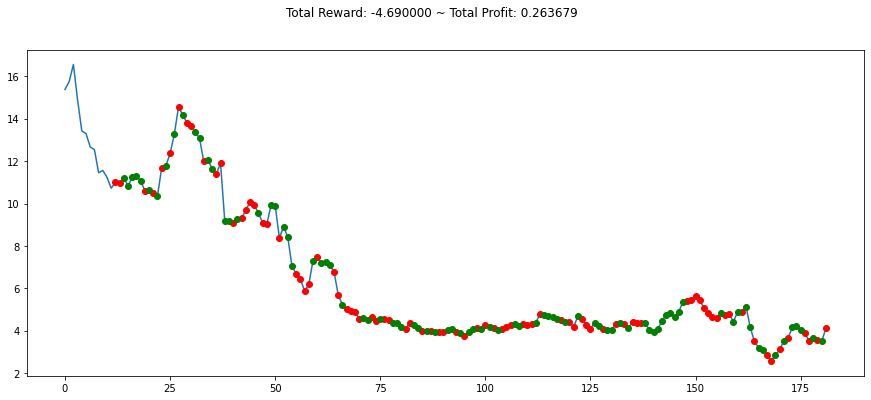

In [17]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

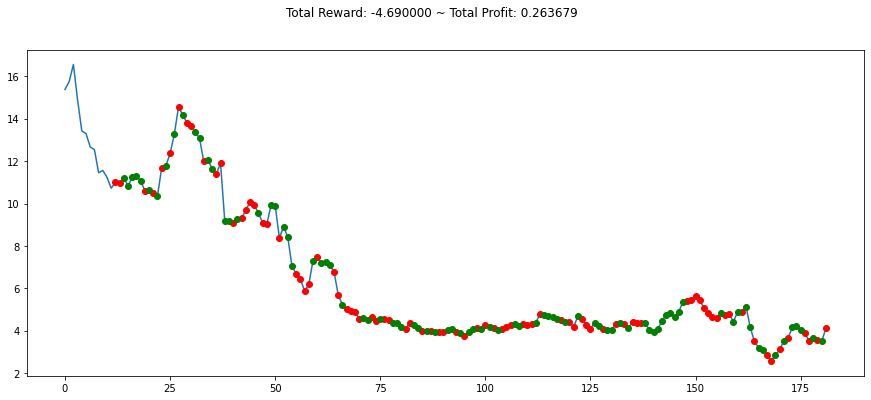

In [18]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()